**Name:** Aniket Bapusaheb Labade

**PRN No.:** RBT21CB012

**Subject:** Machine Learning

**Practical No.5:** A-priori Algorithm on market basket analysis

#### The Apriori algorithm is used for Market Basket Analysis, calculating association rules between objects. It identifies relationships like customers who buy product A also buy product B. The algorithm aims to create association rules, describing how objects are related, often applied to databases with numerous transactions. For instance, in a store like Big Bazar, Apriori helps customers make purchases more conveniently, boosting sales performance.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
df = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [ ]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.dropna(inplace=True)
len(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


406829

In [ ]:
df["InvoiceNo"] = df["InvoiceNo"].astype('str')
df = df[~df["InvoiceNo"].str.contains("C")]
len(df)
top10 = df["Country"].value_counts().head(10)
top10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1462
Australia           1185
Name: Country, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


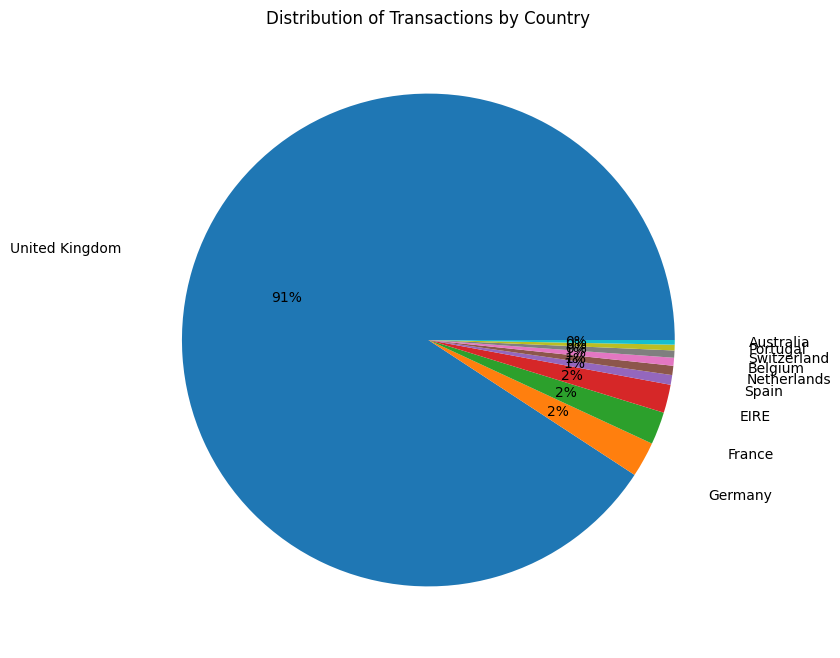

In [ ]:
plt.figure(figsize=[8, 8])
plt.pie(top10, labels=top10.index, autopct='%0.0f%%', labeldistance=1.3)
plt.title("Distribution of Transactions by Country")
plt.show()

In [ ]:
basket = df[df['Country'] == "United Kingdom"] \
    .groupby(['InvoiceNo', 'Description'])["Quantity"] \
    .sum().unstack() \
    .reset_index().fillna(0) \
    .set_index("InvoiceNo")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def encode_values(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_encoded = basket.applymap(encode_values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket_filtered = basket_encoded[(basket_encoded > 0).sum(axis=1) >= 2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets = apriori(basket_filtered, min_support=0.03, use_colnames=True).sort_values("support", ascending=False)
frequent_itemsets.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                              itemsets
99  0.121358  (WHITE HANGING HEART T-LIGHT HOLDER)
44  0.093197             (JUMBO BAG RED RETROSPOT)
80  0.090466            (REGENCY CAKESTAND 3 TIER)
6   0.084417       (ASSORTED COLOUR BIRD ORNAMENT)
71  0.082986                       (PARTY BUNTING)
58  0.072841             (LUNCH BAG RED RETROSPOT)
86  0.064971   (SET OF 3 CAKE TINS PANTRY DESIGN )
52  0.064646             (LUNCH BAG  BLACK SKULL.)
69  0.061004     (PAPER CHAIN KIT 50'S CHRISTMAS )
64  0.060939     (NATURAL SLATE HEART CHALKBOARD )

In [ ]:
assoc_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values("lift", ascending=False).reset_index(drop=True)
assoc_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents                         consequents  \
0  (ROSES REGENCY TEACUP AND SAUCER )   (GREEN REGENCY TEACUP AND SAUCER)   
1   (GREEN REGENCY TEACUP AND SAUCER)  (ROSES REGENCY TEACUP AND SAUCER )   
2           (LUNCH BAG RED RETROSPOT)           (LUNCH BAG PINK POLKADOT)   
3           (LUNCH BAG PINK POLKADOT)           (LUNCH BAG RED RETROSPOT)   
4           (JUMBO BAG RED RETROSPOT)           (JUMBO BAG PINK POLKADOT)   
5           (JUMBO BAG PINK POLKADOT)           (JUMBO BAG RED RETROSPOT)   
6           (LUNCH BAG  BLACK SKULL.)           (LUNCH BAG RED RETROSPOT)   
7           (LUNCH BAG RED RETROSPOT)           (LUNCH BAG  BLACK SKULL.)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.043900            0.039802  0.030957    0.705185  17.717202   
1            0.039802            0.043900  0.030957    0.777778  17.717202   
2            0.072841            0.055086  0.030632    0.420536   7.634188   
3            0.055086            0.072841  0.030632    0.556080   7.634188   
4            0.093197            0.052680  0.032908    0.353105   6.702899   
5            0.052680            0.093197  0.032908    0.624691   6.702899   
6            0.064646            0.072841  0.031478    0.486922   6.684737   
7            0.072841            0.064646  0.031478    0.432143   6.684737   

   leverage  conviction  zhangs_metric  
0  0.029210    3.256952       0.986881  
1  0.029210    4.302452       0.982670  
2  0.026620    1.630668       0.937283  
3  0.026620    2.088574       0.919671  
4  0.027999    1.464412       0.938253  
5  0.027999    2.416152       0.898124  
6  0.026769    1.807051       0.909181  
7  0.026769    1.647164       0.917216